### Project 4: Predicting Customer Churn, Contract tenure and Services that drive up retention
import pandas as pd
 # Source
glass = pd.read_csv('../data/glass.csv')
glass.head()

## Problem:

We have a set of 7044 telco customers who almost all (90%) have opened a telephone line with us.

- Business problem: Driving retention is always a crucial part of a subscription based business (SaaS or Telcos). The challenge is that each organization tends to have its unique recipe to retain a customer and the risks and reasons for customers to churn will vary heavily from one business to another. This is why machine learning and custom predictive algorithms need to be put in place, so that Customer success managers can have a clear ideas of the potential chrun risks in their portfolio, as well as when and how to prioritise their efforts.



## Goal:

- To be able to predict whether a customer will churn or not - and know what are the features (products included in their subscription) or Demographics that have the strongest weight in our predictive analytics.


- We will also try to predict the length of tenure of customers



## Data Set:

- The data set is composed of 21 features - Most of them are categorical data and therefore cannot directly be used for predictive analytics.

- Our cleaning process will not only need to be used for  dropping features or filling NA, but also to get Dummies on all our categorical data.


## Methodology applied:


- EDA: We will start by exploring the data set, understanding the data types, whether our target column for classification is imbalanced of not, get dummies, explore the correlations and any risks of multicolinearity. Next, we will build our final data sets and perform some cross validation.

- If the target data happens to be imbalanced, we will perform a Data Rebalancing.

- Predictive methods: we will first use a classic Logistic regression algorythm. Given our high number of categorical data, our prediction may work better with a Random Forest Classifier - given that it will split our data into multiple bags (substs), train each subsets and combined the result of the analysis.

## Additional consideration:
  
  
To go one step further, we will use a decision tree classifier, which will enable a customer success manager to understand which feature plays the strongest role in retaining a customer or not, and what is the combination of features that gives the highest likelihood to retain clients or not.

We will also attempt to predict the tenure of our customer using a Train Test Split Linref - regression algorithm


## Precision evaluation:

We will use the F1 score to identify how accurateis our predictive algorithm, and which of the models built is the most appropirate.

 
## Potential Limitations:


- Not having enough contextual data outside of the budget, demographics and product included in the subscription (such as the current sentiment on the brand from the customer or the number of support tickets being filed in their lifetime, or the usage rate of our product)

- Imbalanced Data --> causing our algorithm to be skewed towards one specific label -  Smote Tomek method will be used to resolve this.



In [13]:
# Telco identification data set
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

 # source
telco = pd.read_csv('C:/Users/pcleenewerck/Documents/GitHub/homework/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# let's examine the default index, data types, and shape

#Start by the index:
print(telco.index)

#Followed by the type:
print(telco.dtypes)

#Followed by the shape:
print(telco.shape)

RangeIndex(start=0, stop=7043, step=1)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
(7043, 21)


In [15]:
#Let's first check for imbalance in the target data

telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
#Let's calculate the median of the contract tenure for all customers

print('Tenure Median', telco['tenure'].median())

print('Tenure Mean', telco['tenure'].mean())


Tenure Median 29.0
Tenure Mean 32.37114865824223


In [17]:
#Let's now check if those who tend to churn are those customers who pay more

print(telco.groupby('Churn').MonthlyCharges.mean())

print(telco.groupby('Churn').MonthlyCharges.median())


Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
Churn
No     64.425
Yes    79.650
Name: MonthlyCharges, dtype: float64


From this first lookup, it seems that both the median and mean of the monthly charges indicate that churning customers tend to spend a little more monthly than those who do not churn. This suggests some potential correlation in between higher monthly charges and the fact that a customer will churn.

A potential danger is the following: Since some services are more expensive than others, we will need to check whether the usage/access to some specific services have colinearity with the price increase. If yes, we will have to arbitrate whether monthly charges can be part of our predicting features.



# Get Dummies for our categorical variables

Transforming Categorical Data into Dummies

In [18]:
#Let's count the unique values for each feauture, as we need to identify 
#how many dummies we need to create for multilabel feautres

telco.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
#let's first select the variables that are objects and thus may need to be transformed into dummies
# and create a new data frame out of it
categorical_telco_df = telco.select_dtypes(include=['object'])

In [20]:
print(categorical_telco_df)

      customerID  gender Partner Dependents PhoneService     MultipleLines  \
0     7590-VHVEG  Female     Yes         No           No  No phone service   
1     5575-GNVDE    Male      No         No          Yes                No   
2     3668-QPYBK    Male      No         No          Yes                No   
3     7795-CFOCW    Male      No         No           No  No phone service   
4     9237-HQITU  Female      No         No          Yes                No   
5     9305-CDSKC  Female      No         No          Yes               Yes   
6     1452-KIOVK    Male      No        Yes          Yes               Yes   
7     6713-OKOMC  Female      No         No           No  No phone service   
8     7892-POOKP  Female     Yes         No          Yes               Yes   
9     6388-TABGU    Male      No        Yes          Yes                No   
10    9763-GRSKD    Male     Yes        Yes          Yes                No   
11    7469-LKBCI    Male      No         No          Yes        

In [21]:
# CustomerID and Total charges are totally irrelevant to us, so let's drop them

categorical_telco_df = categorical_telco_df.drop(columns = ['customerID', 'TotalCharges'])

In [22]:
# Let's then get dummies for all our categorical variables that remain after the two features we dropped in the previous step
categorical_telco_df_clean = pd.get_dummies(categorical_telco_df)

In [23]:
#We're now going to drop one out of the two options of our target data --> Customer Churn - and keep only the 'yes'

categorical_telco_df_clean = categorical_telco_df_clean.drop(columns = ['Churn_No'])

In [24]:
#let's visualize our reuslting categorical dataframe
categorical_telco_df_clean

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
5,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
6,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
7,1,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
8,1,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
9,0,1,1,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0


# Building our final DataFrame

In [25]:
#Let's now clean a little bit our initial Telco dataframe and convert total charges as a float

telco['Total_Charges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')

In [26]:
telco.Total_Charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: Total_Charges, Len

In [27]:
#Let's now recheck the type:
print(telco.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Total_Charges       float64
dtype: object


In [28]:
#Let's now attach our Clean dummies data frame to our initial Data Frame

telco_clean_df = pd.concat([telco, categorical_telco_df_clean], axis=1)

In [29]:
telco_clean_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,0,0,1,0,0,1,0,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,1,0,0,0,1,0,0,1,0,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,1,0,0,0,1,0,1,0,0,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,1,0,0,1,0,0,0,0,1,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,1,0,0,0,1,0,0,1,0,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,0,1,0,1,0,1,0,0,0,0


In [30]:
#Let's now recheck the types with the two dataframe we've attached:
print(telco_clean_df.dtypes)

customerID                                  object
gender                                      object
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
InternetService                             object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
Contract                                    object
PaperlessBilling                            object
PaymentMethod                               object
MonthlyCharges                             float64
TotalCharges                   

In [31]:
#Let's now drop all our object columns to only keep numerical data

telco_clean_df = telco_clean_df.drop(telco_clean_df.select_dtypes(include='object'), axis = 1)

In [32]:
#let's now analyze our DataFram
telco_clean_df

,SeniorCitizen,tenure,MonthlyCharges,Total_Charges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
5,0,8,99.65,820.50,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
6,0,22,89.10,1949.40,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
7,0,10,29.75,301.90,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
8,0,28,104.80,3046.05,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
9,0,62,56.15,3487.95,0,1,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0


In [33]:
#let's also get dummies for the seniors

senior_citizen_dummies = pd.get_dummies(telco_clean_df.SeniorCitizen, prefix='SeniorCitizen')

In [34]:
telco_clean_df = pd.concat([telco_clean_df, senior_citizen_dummies], axis=1)

In [35]:
#We're now going to check whether all our data is numerical or not
print(telco_clean_df.dtypes)

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
Total_Charges                              float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

## Generating heatmaps to identify correlations

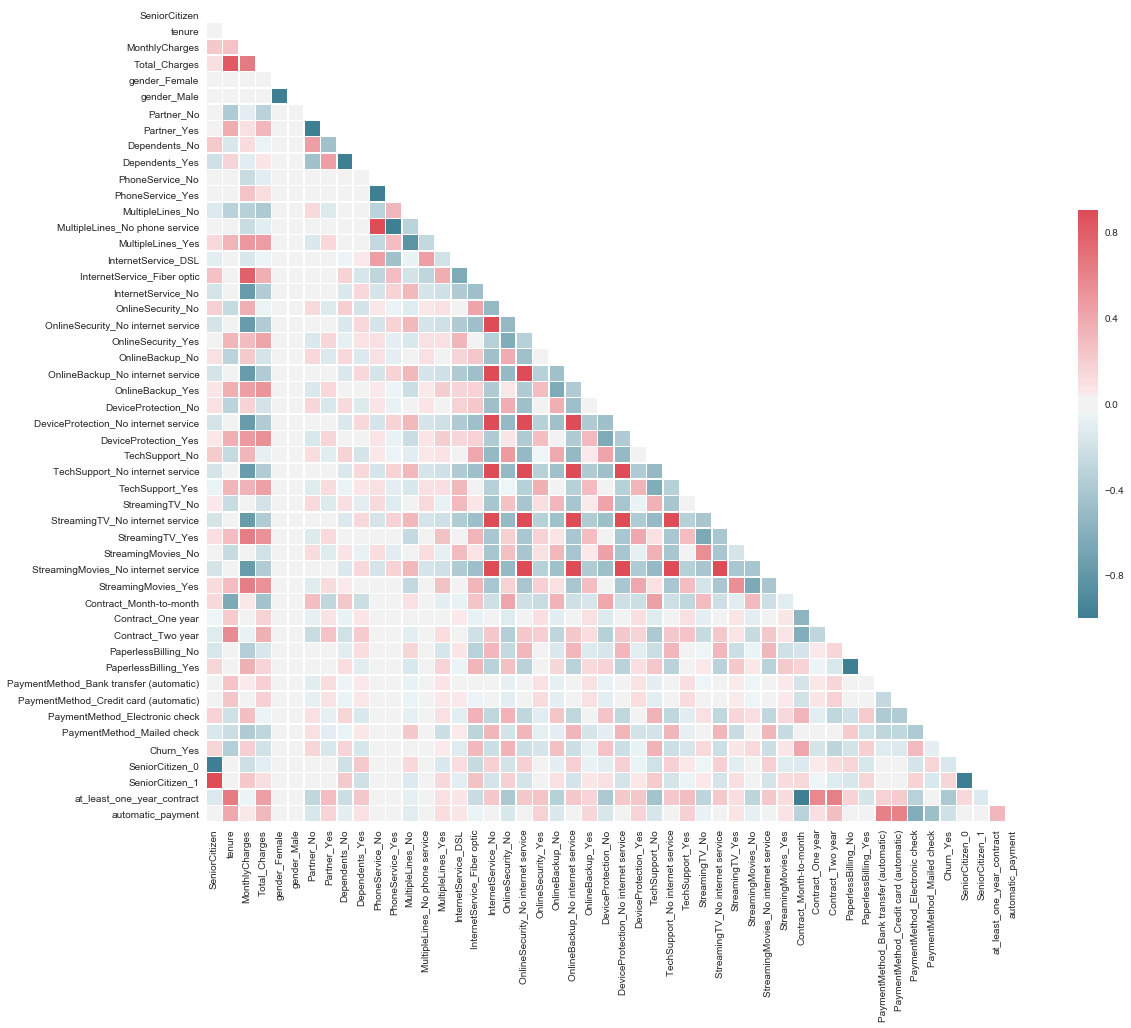

In [80]:
#LEt's now identify the correlation between the predicive variables and the target column

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = telco_clean_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

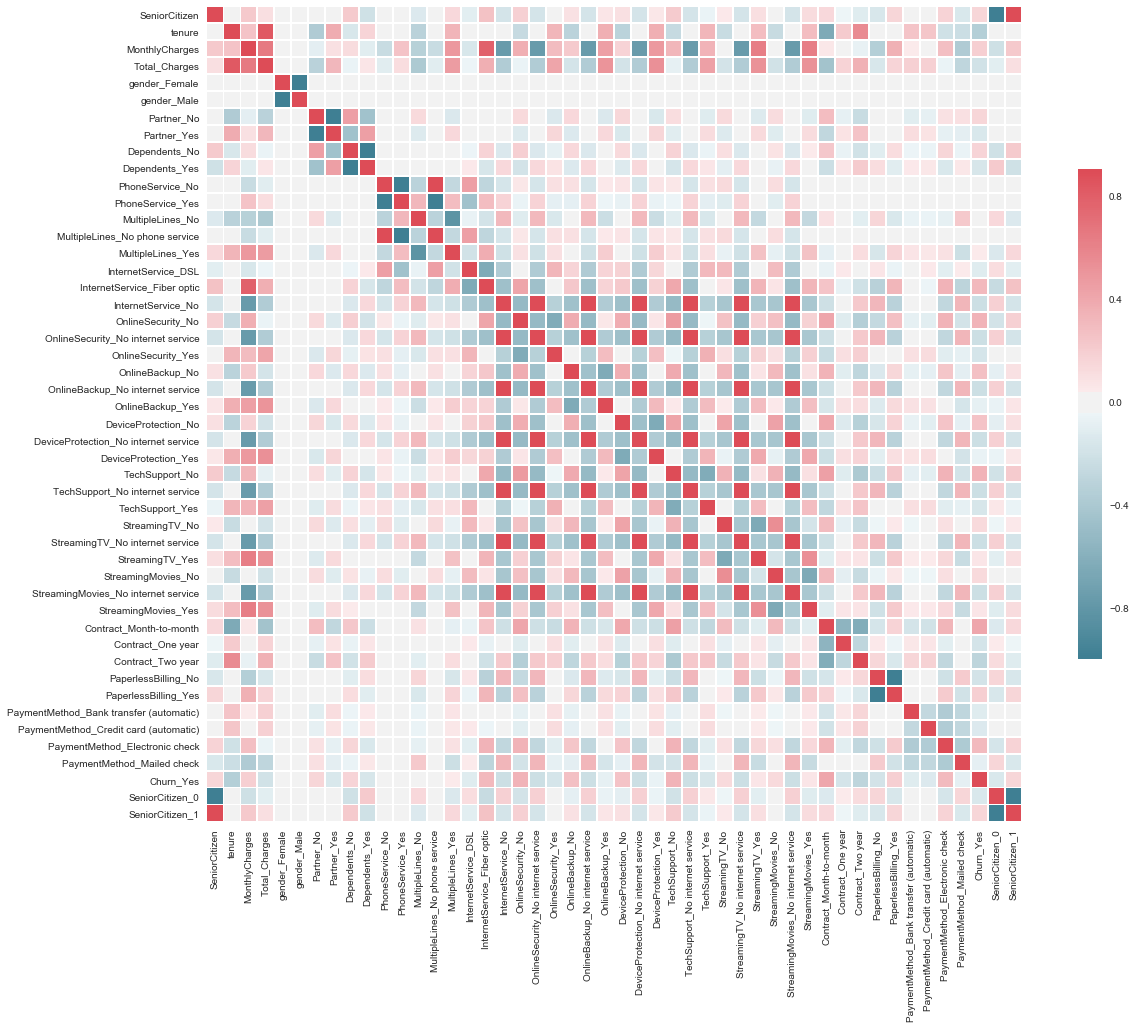

In [37]:
# Visualize the full correlation matrix in Seaborn using a heat map.
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(telco_clean_df.corr(), cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .6})

In [38]:
#let's quickly calculate the correlation between the Churn Yes and Senior Citizen

telco_clean_df['SeniorCitizen_1'].corr(telco_clean_df['Churn_Yes'])

0.15088932817647313

In [39]:
telco_clean_df['Partner_No'].corr(telco_clean_df['Churn_Yes'])

0.15044754495917673

In [40]:
#Let's first List down the columns with the most correlation to our 
# We're going to take all our features that seem to be somehow correlated to our target data 'Customer churns'

#Let's try to identify them one by one and see if we can see some business rationale, just to make sure that 
# outside our numerical analysis, we can still see a legit reason to include a feature or not in our regression


###### The features that seem correlated with our Churning customers are:

- Monthly Charges (higher): This seems logical as the higher the monthly price is, the higher chance a client will churn as he/she may feel the price is too high - However, we had to remove it since it was a feature showing high multicollinearity with Optic Fiber Connection - We decided to remove Monthly Charges and Keep Optic Fiber from the model
- Partner = No: This can make sense as well, as people who are in couple tend to be a little busier and less bored than single folks and thus watch less dramas - Single folks are big movie watchers and will churn less
- Dependents = No: This makes sense as people who have kids (assuming kids are the dependents) will tend to keep their subscription (let's be honest, who doesn't let the kids get entertained while having fun...;) whereas those who have no kids may use their subscription less
- Multiple Lines = Yes: Maintaining many lines can increase subscription prices - and also include the likelihood to experience bugs - therefore accelerating the churns 
- Fiber Optic = Yes: People with Fiber Optic tend to be more tech savvy and also have a fast internet connection that gives them the opportunities to replace our services by Online Streaming on Pirate websites - Online free movie streaming can take a lot of time to load and a less speedy internet connection will make them horrible to use. Therefore it makes sense that those with higher speed internet connection churn more, as they have more substitutes to our services by default
- Online Security = No: it's no secret that those with no online security will have hihger chances to experience cyber attacks. A cyber attack will cause frustration and increase the likelihood to churn
- Online Backup = No: Losing all your data in case of a bug or a terrorist attack will cause frustration and increase your likelihood to go away
- Tech Support = No: Support is a perfect channel to delight and build rapport with customers, as well as reducing the number of frustrations experienced by a customer throughout the course of his subscription
- Streaming TV = No: This makes sense as streaming services are becoming the trend now, and customers without it are likely to find our services very plain
- Streaming Movies = No: Same as for Streaming TV, customers without streaming movies may find our services less attractive, or even very boring (too bad, traditional TV really sucks these days... Sniff!)
- Month to Month contract = Yes: People with month to month contracts may be a little more broke than the average, as those poor guys can't even afford to make an annual payment upfront. As a result, they will churn more often, mostly for economic reasons.
- Paperless Billing = Yes: People with paperless billing are usually the most savvy and will have a tendency to easily go to our digital competitors such as netflix.
- Payment method = Electronic Check: It makes sense as people with electronic check are very savvy too and are those who will easily find substitutes for our services
- Device Protection = No: Those who have no device protection will break things more often and thus will be lazy or too poor to replace their original device and may churn more easily
- Senior Citizen = Yes - Senior Citizen are less tech savvy, using multiple control panels is difficult for them, and they may not necessarily get what Streaming TV or Streaming movies are - Thus, they will tend to churn more

Notes for later: to get dummies for senior citizen as well



Rebalancing our data set

In [41]:
#Building our predictive and target data variables

features_col = ['MonthlyCharges', 'Partner_No', 'Dependents_No', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'DeviceProtection_No', 'SeniorCitizen_1']

Xs = telco_clean_df[features_col]
y = telco_clean_df.Churn_Yes



In [42]:
#Installing and importing packages
!pip install imblearn

from imblearn.over_sampling import SMOTE




You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
from collections import Counter
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_sample(Xs, y)
#print('Resampled dataset shape {}'.format(Counter(y_res)))

In [44]:
#print('Resampled dataset shape {}'.format(Counter(y_res)))

X_samp = pd.DataFrame(X_res)
X_samp.columns = ['MonthlyCharges', 'Partner_No', 'Dependents_No', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'DeviceProtection_No', 'SeniorCitizen_1']
y_samp = pd.DataFrame(y_res)
y_samp.columns = ['Churn_Yes']
X_samp.head()


,MonthlyCharges,Partner_No,Dependents_No,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,DeviceProtection_No,SeniorCitizen_1
0,29.85,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,56.95,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,53.85,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,42.30,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,70.70,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [45]:
#

y_samp.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [46]:
y_samp.tail()

,Churn_Yes
9865,1
9866,1
9867,1
9868,1
9869,1


In [47]:
X_samp.shape

(9870, 15)

In [48]:
y_samp.Churn_Yes.value_counts()

1    4935
0    4935
Name: Churn_Yes, dtype: int64

In [49]:
#Combining our Data frames

telco_clean_final_df = pd.concat([X_samp, y_samp], axis=1)


In [50]:
telco_clean_final_df

,MonthlyCharges,Partner_No,Dependents_No,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,DeviceProtection_No,SeniorCitizen_1,Churn_Yes
0,29.850000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0
1,56.950000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
2,53.850000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,1
3,42.300000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
4,70.700000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1
5,99.650000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,1
6,89.100000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0
7,104.800000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,1
8,56.150000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0
9,49.950000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0


### Training our Data and Performing Logistic regression to predict Churns

In [51]:
from sklearn import linear_model, model_selection, metrics

X = telco_clean_final_df[['Partner_No', 'Dependents_No', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'DeviceProtection_No', 'SeniorCitizen_1']]
y = telco_clean_final_df['Churn_Yes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [52]:
1. - y_train.mean()

0.5021615779519049

In [53]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.7791734197730956


In [54]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [55]:
#obtain the Confuction Matrix of our Tested Model

metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[ 901,  317],
       [ 228, 1022]], dtype=int64)

In [56]:
# Baseline errors, and display average baseline error
y_pred=logit_pred_proba > .5
baseline_errors = abs(y_pred - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  23.69


## Verify the accurary of our prediciton using the F1 Score - Since the F1 score can be interpreted as a weighted average of the precision and recall 

In [57]:
from sklearn.metrics import f1_score

In [58]:
f1_score(y_test, y_pred=logit_pred_proba > .5, average='macro')  

0.7786413397575499

## Use Random Forest to predict our data with a different model and evaluate the difference

In [59]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [61]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [63]:
#calculate the absolute Errors

errors = abs(predictions - y_test)

In [64]:
#Print our the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.22 degrees.


In [381]:
f1_score(y_test, predictions > .5, average='macro')

0.8419507389162562

#### Conclusion: By Testing ouy Model with a Random forest, we have successully improved our predictin accuracy our F1 Score went from 0.78 to 0.84 

# Evaluate the Importance a each feature for our Churning or non Churning Customers

Using our Decision Tree Classifier PRedictive model, we're going to evaluate the importance of each feature

In [383]:
#import the model Tree Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [395]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn import tree
import collections
import pydotplus

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
dtree2 = dtree.fit(X,y)

In [396]:

import sys
!{sys.executable} -m pip install graphviz

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [397]:

import sys
!{sys.executable} -m pip install pydotplus

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [398]:
import pydotplus

In [399]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


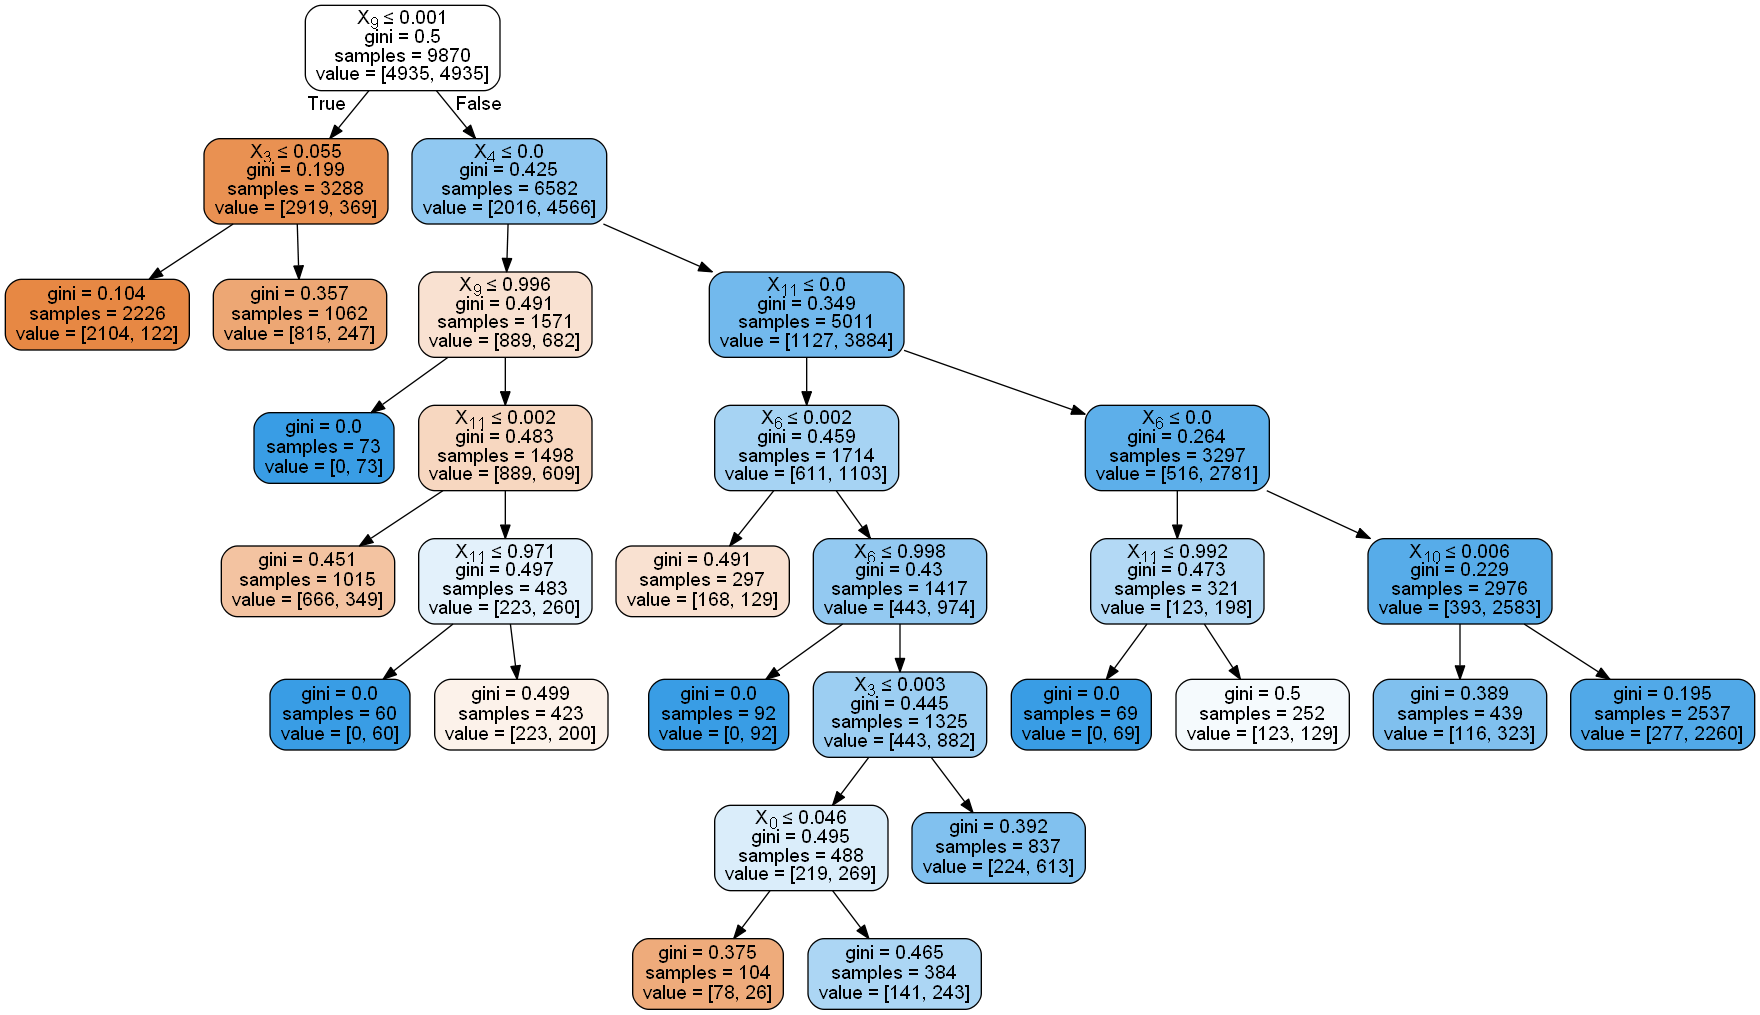

In [400]:
dot_data = StringIO()
export_graphviz(dtree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [401]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [402]:
labels=['Partner_No', 'Dependents_No', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'DeviceProtection_No', 'SeniorCitizen_1']

In [409]:
estimator = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
estimator.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [410]:
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

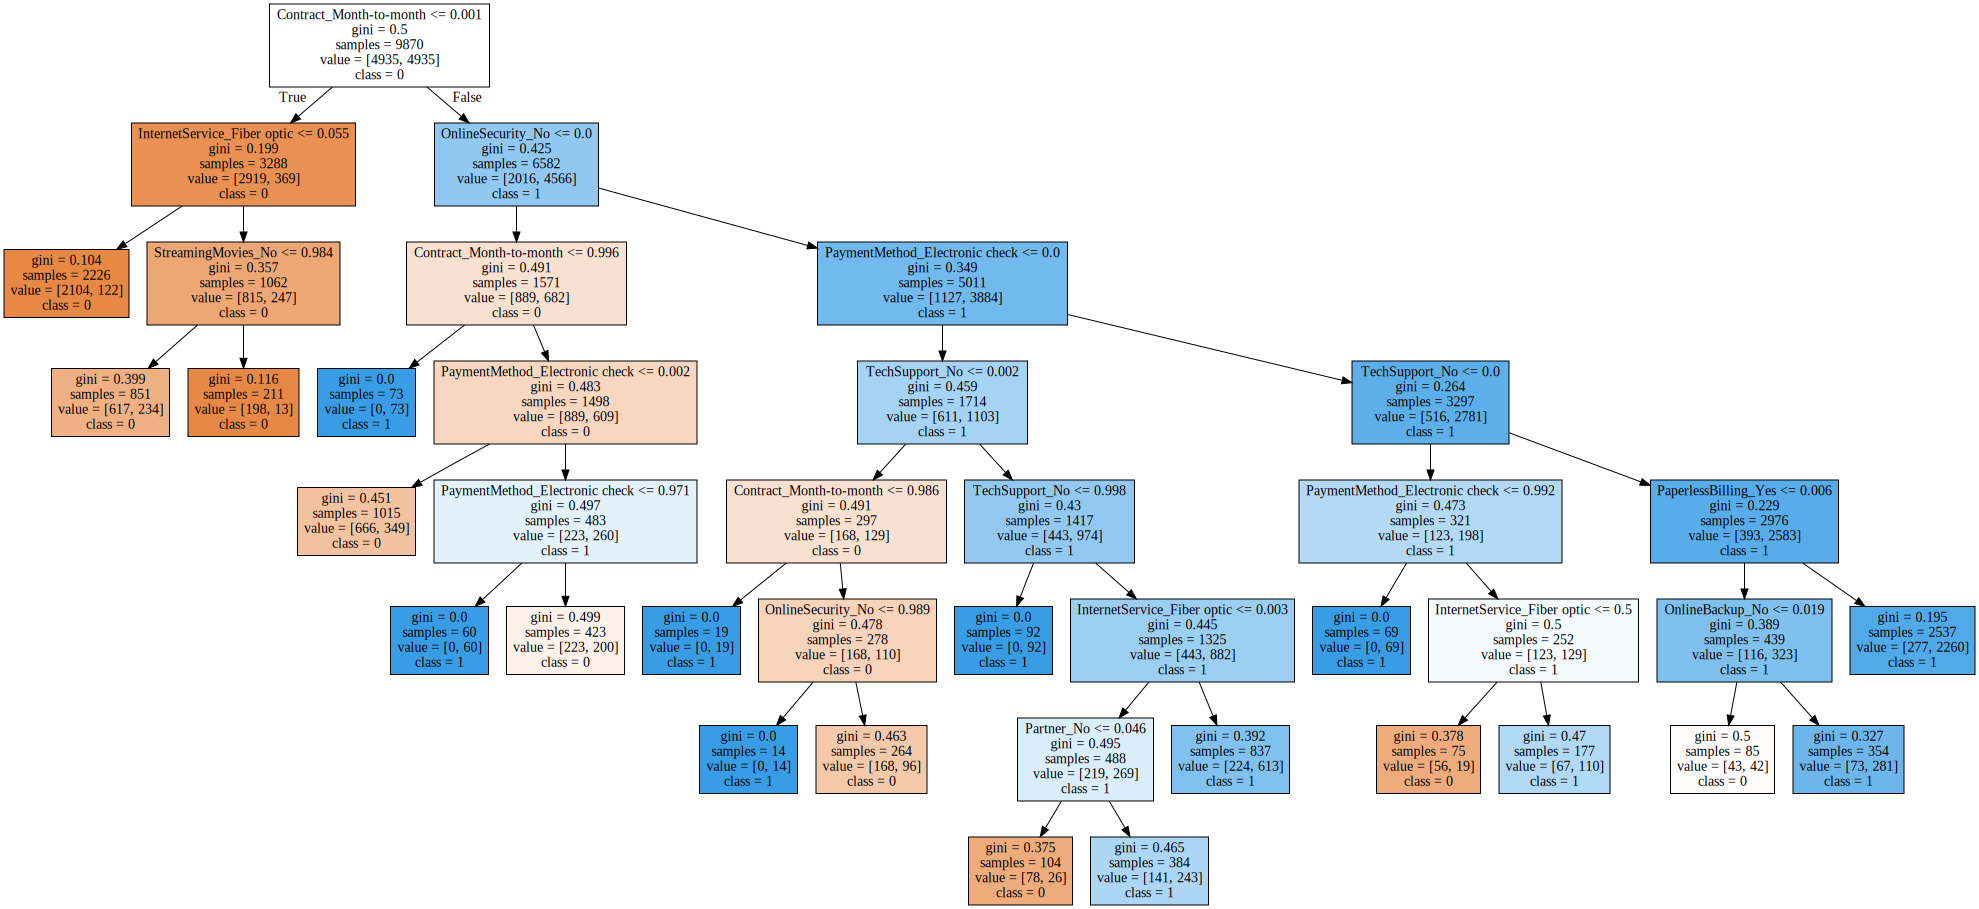

In [411]:
display(SVG(graph.pipe(format='svg')))

## Give Explanations to the Decision tree above:

The decision tree makes us able to separate customers into two main categories:

### Customer with low churning risks:


The decision tree above indicates that Having a month to Month contract is one of the most important features of our Data Set - Having a Contract term set to month to month or not is setting a customer in a vastly different kind of scenario.

Customers who do not have a monthly term of payment, but an annual payment term instead - tend to be the most stable, especially when combined to slow internet speed. This category of customers would tend to stay with this Teclo company and be a lot more stable, even when they do not have streaming services.

### Customer with higher churning risks

On the other hand, clients on a monthly contract will tend to chrun a lot more than those on longer payment terms. In our correlation analysis, we've identified that Tech support or Online security tended to be drive the churn rate down. However, although online security, tech support and automatic payment methods tend to help prevent a number of churns (espeically when combined together, the overall effect of these services / options will be slightly limited.

### Recommendation to Management:

- Create a higher priced monthly package that would combine the TV/Mobile contract  + tech support & and online security - This package should only be available with automatic payment methods (you can do it in partnership with an online bank to attract a sizable and qualified audience for the promotion of this service.

- Enacourage your Sales Rep to give away Annual packages with higher discounts




### Predicting the length of tenure of the churning customers

What we will do is to take the Revaluate the matrix of all our features and will identify which are the elements that who high correlation with the Tenure (our target data this time)

In [ ]:
# Visualize the full correlation matrix in Seaborn using a heat map.
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(telco_clean_df.corr(), cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .6})

Which features seem to have a a high corelations with the Tenure:

- Monthly Charges
- Partner = Yes
- Dependent = Yes
- Multiple Lines = Yes
- Online Security = Yes
- Online Backup = Yes
- Device Protection = Yes
- Tech Suppport = Yes
- Streaming TV = Yes
- Streaming Movies = Yes
- One Year Contract = Yes
- Two years contract = Yes (see below on how we treated the two contract features)
- Payment Method Bank Transfer - Automatic = Yes
- Payment Method Credit Card - Automatic = Yes

#### Length of Contracts

The features One Year or Two years contract are both highly correlated to longer tenure - for obvious reasosn as someone signing with these commitements is at least sure to stay for 12 or 24 months. The problem is that these two features will automatically show a very high negative correlation with one another  - The solution is to merge these two features into one, named "at_least_one_year_contract" and add it as a new feature in the data frame  - which is what we've done below.


#### Payment Method

Similarly Automated Bank Transfers and credit card automated payments are showing very high negative colinearity- therefore we will create a brand new features combining these two under "Automatic payment"


In [65]:
telco_clean_df['at_least_one_year_contract'] = telco_clean_df['Contract_One year'] + telco_clean_df['Contract_Two year']
telco_clean_df['automatic_payment'] = telco_clean_df['PaymentMethod_Bank transfer (automatic)'] + telco_clean_df['PaymentMethod_Credit card (automatic)']

Not surprisingly we see that most features showing a correlation with a higher tenure are the opposite of those that are corelated with a Churn_Yes customer - This makes sense, as the least likely a customer is to churn, the higher will be his tenure before moving away from our brand

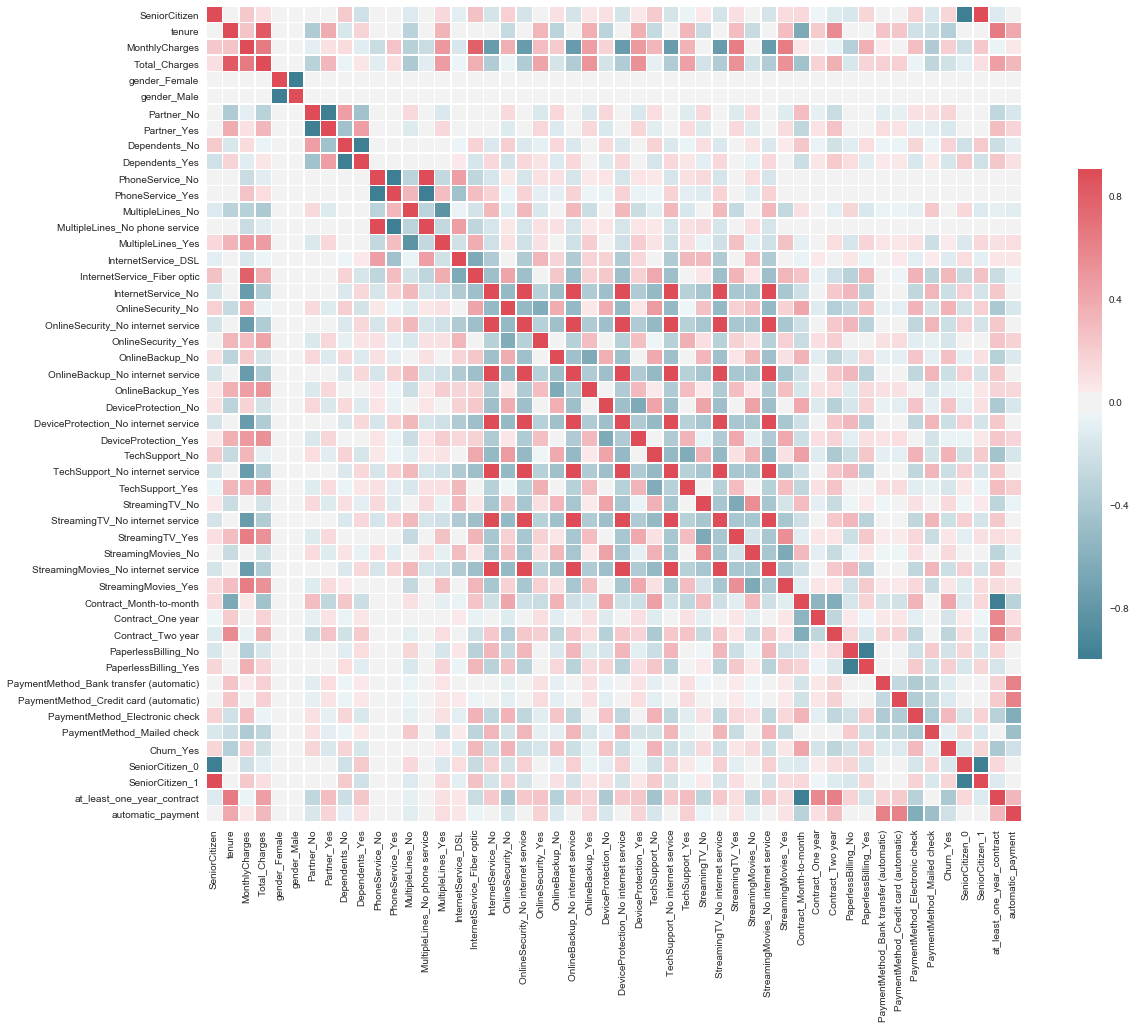

In [66]:
# Visualize the full correlation matrix in Seaborn using a heat map.
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(telco_clean_df.corr(), cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .6})

In [67]:
print(telco_clean_df.dtypes)

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
Total_Charges                              float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
#Let's build the features we will need for our model

feature_cols = ['MonthlyCharges', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'OnlineBackup_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'at_least_one_year_contract', 'automatic_payment'] 




In [70]:
# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.4999579691755699

In [73]:
#Build a Function that uses a model to predict our target and return the coeffecients

def tenure_lin_reg_model(telco_clean_df, feature_cols):
    X = telco_clean_df[feature_cols]
    y = telco_clean_df.tenure
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    return list(zip(feature_cols, linreg.coef_))

In [74]:
tenure_lin_reg_model(telco_clean_df, feature_cols)

[('MonthlyCharges', -0.045402919225609684),
 ('Partner_Yes', 8.09195144756467),
 ('Dependents_Yes', -2.2197604277918437),
 ('MultipleLines_Yes', 9.195471915749565),
 ('OnlineSecurity_Yes', 3.78757920867875),
 ('DeviceProtection_Yes', 4.490684441596039),
 ('TechSupport_Yes', 0.6087833527593558),
 ('OnlineBackup_Yes', 7.380670923735102),
 ('StreamingTV_Yes', 3.1658033161964667),
 ('StreamingMovies_Yes', 3.2102287498297106),
 ('at_least_one_year_contract', 23.281821713089915),
 ('automatic_payment', 7.13047868704485)]

In [75]:
    X = telco_clean_df[feature_cols]
    y = telco_clean_df.tenure
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)

In [76]:
# MAE is the same as before.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# MSE and RMSE are larger than before.
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 12.392741234761065
MSE: 248.93139883961368
RMSE: 15.777559977373361


In [77]:
list(zip(feature_cols, linreg.coef_))

[('MonthlyCharges', -0.04745233451854865),
 ('Partner_Yes', 8.384649946651969),
 ('Dependents_Yes', -2.4406576641554167),
 ('MultipleLines_Yes', 9.112684235285393),
 ('OnlineSecurity_Yes', 3.761982087602478),
 ('DeviceProtection_Yes', 4.530466425162985),
 ('TechSupport_Yes', 0.7512830030845921),
 ('OnlineBackup_Yes', 7.246678245646986),
 ('StreamingTV_Yes', 2.9101158694703972),
 ('StreamingMovies_Yes', 3.570177860449182),
 ('at_least_one_year_contract', 23.171878008650104),
 ('automatic_payment', 7.113907715261497)]

In [78]:
y_pred

array([10.40586097, 45.32335884, 35.22819589, ..., 12.00412032,
        3.66217747, 24.65078673])

In [79]:
#LEt's now try to evaluate the 

Note for tomorrow

- Find out why clasification does not work (type of y)
- One of the reasons the prediction for Tenure does not work might be because too many of those who churn in the first 12 months - Let's try to reapply the model to predict those above 12 months
- Let's also shape two more model: one with customers who did not churn and customers who churned and see what features tend to be there the most with classifiers
- Make an interpretation of Classifiers
